# ----------------- Analyse Grid- und NetCDF-Daten mit R -----------------

## DGM einlesen und plotten

Als EInstieg schauen wir uns an, wie einfach man einen schönen Plot eines DGMs mit R erstellen kann. Wir lesen das File "DG100_masked.tif" ein, extrahieren das Raster-Grid aus dem .tif Format und legen es als Raster-Objekt an (raster() aus der Bibliothek "raster"). Anschließend bestimmen wir mit der Funktion extent() die Eck-Koordinaten und Ausmaße und lassen uns diese ausgeben.

In [1]:
library(raster)

file ="./DG1000_masked.tif"
dem = raster(file)

raster_extent = extent(dem)

raster_extent

Loading required package: sp


class       : Extent 
xmin        : 99500 
xmax        : 700500 
ymin        : 249500 
ymax        : 600500 

Mit NAvalue() weisen wir dem raster-Objekt "dem" dan Fehlwert zu, in diesem Fall 0.

In [2]:
NAvalue(dem) <- 0


Wir plotten das DGM mit der levelplot()-Funktion. Über den par.settings Parameter lassen sich verschieden Farbskalen einstellen, die wir per Variable "theme" auswählen und zuweisen. Hierzu benötigen wir die Bibliothek "rasterVis".

Loading required package: lattice
Loading required package: latticeExtra
Loading required package: RColorBrewer


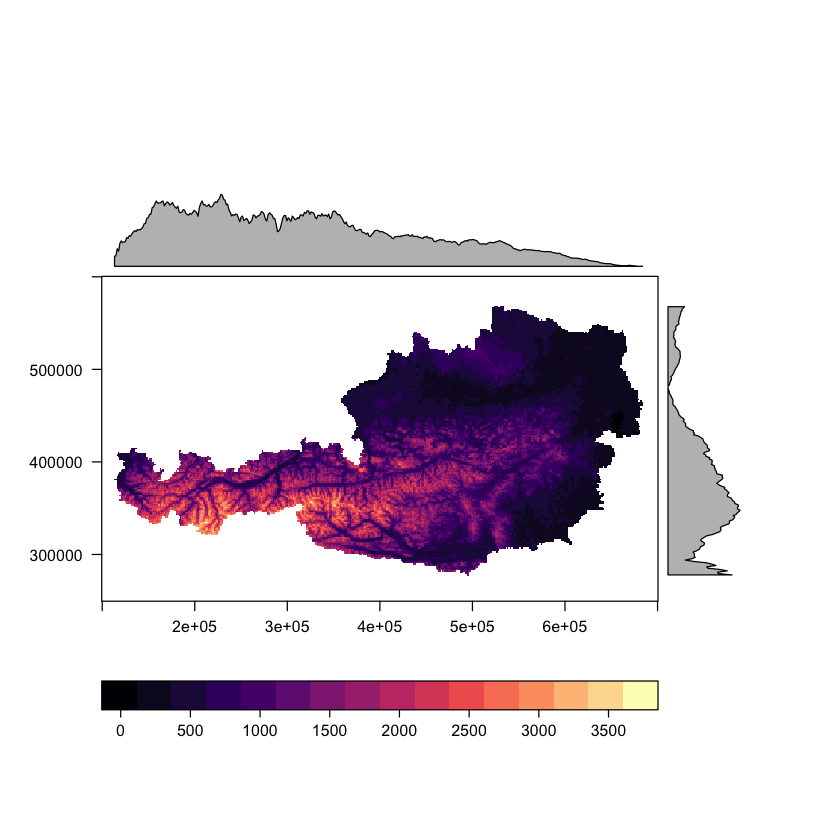

In [3]:
library(rasterVis)
theme = rasterTheme #purple to yellow 1 (standard)
# theme = infernoTheme #purple to yellow 2
# theme = plasmaTheme #purple to yellow 3
# theme = RdBuTheme #red to blue
# theme = viridisTheme #blue to green
# theme = YlOrRdTheme #yellow to red
# theme = BuRdTheme #blue to red
# theme = GrTheme #grey (dark to bright)
# theme = BTCTheme #dark blue to light blue

levelplot(dem, layers = 1, contour=FALSE, par.settings = theme)

## Einlesen eines NetCDF-Files und Variablen extrahieren

Als nächstes wollen wir Daten eines regionalen Klimamodells (hier WRF) einlesen und damit arbeiten. Die Daten liegen im weit verbreiteten NetCDF-Format vor (https://www.unidata.ucar.edu/software/netcdf/ und https://de.wikipedia.org/wiki/NetCDF. Wir laden uns mit download.file() die Daten in unseren Workspace herunter. 

In [4]:
#download.file("http://geography-ahc.uibk.ac.at/Data/SFCwrfout_d03_1980-2009_T2_monmean.grd",destfile="./SFCwrfout_d03_1980-2009_T2_monmean.grd")

Mit der Funktion nc_open() aus der Bibliothek "ncdf4" lassen sich NetCDF-Dateien direkt in R öffnen. Mit print() lassen wir uns den Header, also die Metadaten des Files anzeigen.

In [5]:
library(ncdf4)

ncin = nc_open("./SFCwrfout_d03_1980-2009_T2_monmean.grd")

ncin

File ./SFCwrfout_d03_1980-2009_T2_monmean.grd (NC_FORMAT_NETCDF4):

     3 variables (excluding dimension variables):
        float XLONG[west_east,south_north]   (Contiguous storage)  
            standard_name: longitude
            long_name: longitude
            units: degrees_east
            _CoordinateAxisType: Lon
        float XLAT[west_east,south_north]   (Contiguous storage)  
            standard_name: latitude
            long_name: latitude
            units: degrees_north
            _CoordinateAxisType: Lat
        float T2[west_east,south_north,Times]   (Chunking: [246,266,1])  
            units: K
            coordinates: XLAT XLONG
            FieldType: 104
            MemoryOrder: XY 
            description: TEMP at 2 M
            stagger: 
            cell_methods: Time: mean

     3 dimensions:
        west_east  Size:246
        south_north  Size:285
        Times  Size:360   *** is unlimited ***
            standard_name: time
            units: day as %Y%m

Als nächstes lesen wir mit ncvar_get() die Variablen XLONG und XLAT aus dem NetCDF-File aus und schreiben sie in die R-Variablen lon2d und lat2d und lassen den Anfang der Koordinaten-Felder ausgeben.

In [6]:
lon2d = ncvar_get(ncin,"XLONG")
head(lon2d)

2.951324,2.945343,2.939331,2.933319,2.927277,2.921265,2.915192,2.909149,2.903076,2.897003,⋯,0.8039856,0.7938232,0.7835999,0.7733765,0.7631226,0.7528381,0.7425537,0.7322083,0.7218628,0.7115173
3.012238,3.006287,3.000336,2.994385,2.988403,2.982422,2.976410,2.970398,2.964386,2.958374,⋯,0.8830872,0.8729858,0.8628845,0.8527222,0.8425598,0.8323669,0.8221741,0.8119202,0.8016663,0.7913818
3.073151,3.067261,3.061371,3.055450,3.049530,3.043579,3.037628,3.031677,3.025726,3.019745,⋯,0.9622192,0.9522095,0.9421692,0.9321289,0.9220276,0.9119263,0.9018250,0.8916626,0.8815002,0.8713074
3.134094,3.128235,3.122375,3.116516,3.110657,3.104767,3.098877,3.092987,3.087067,3.081146,⋯,1.0413820,1.0314640,1.0215150,1.0115360,1.0015260,0.9915161,0.9814758,0.9714355,0.9613342,0.9512329
3.195007,3.189240,3.183411,3.177612,3.171783,3.165955,3.160126,3.154266,3.148407,3.142548,⋯,1.1205440,1.1107180,1.1008610,1.0909730,1.0810550,1.0711360,1.0611880,1.0512080,1.0411990,1.0311890
3.255951,3.250214,3.244476,3.238708,3.232941,3.227173,3.221375,3.215576,3.209778,3.203949,⋯,1.1997380,1.1900020,1.1802059,1.1704100,1.1605830,1.1507570,1.1409000,1.1310120,1.1210940,1.1111760


In [7]:
lat2d = ncvar_get(ncin,"XLAT")
head(lat2d)

42.74373,42.78846,42.83320,42.87793,42.92268,42.96742,43.01217,43.05693,43.10169,43.14647,⋯,55.15494,55.20013,55.24532,55.29051,55.33569,55.38087,55.42605,55.47122,55.51640,55.56157
42.74810,42.79284,42.83759,42.88232,42.92707,42.97183,43.01658,43.06135,43.10611,43.15089,⋯,55.16073,55.20592,55.25112,55.29631,55.34150,55.38669,55.43187,55.47706,55.52224,55.56742
42.75246,42.79720,42.84193,42.88667,42.93143,42.97618,43.02095,43.06572,43.11049,43.15527,⋯,55.16647,55.21167,55.25687,55.30207,55.34726,55.39246,55.43765,55.48284,55.52802,55.57321
42.75677,42.80150,42.84625,42.89099,42.93576,42.98051,43.02528,43.07005,43.11483,43.15961,⋯,55.17215,55.21736,55.26257,55.30778,55.35298,55.39817,55.44337,55.48857,55.53376,55.57895
42.76102,42.80577,42.85053,42.89528,42.94003,42.98480,43.02957,43.07434,43.11913,43.16392,⋯,55.17779,55.22301,55.26822,55.31343,55.35864,55.40385,55.44905,55.49425,55.53945,55.58464
42.76525,42.81000,42.85476,42.89952,42.94429,42.98905,43.03383,43.07861,43.12339,43.16818,⋯,55.18338,55.22860,55.27382,55.31904,55.36425,55.40947,55.45467,55.49988,55.54509,55.59029


Wir lesen die Zeitvariable "Times" aus dem NetCDF-File und lassen uns diese ausgeben. So sehen wir, welche Zeitschritte in der Datei enthalten sind.

In [8]:
time = ncvar_get(ncin,"Times")

time


[1] 19800101 19800201 19800301 19800401 19800501 19800601 19800701 19800801
  [9] 19800901 19801001 19801101 19801201 19810101 19810201 19810301 19810401
 [17] 19810501 19810601 19810701 19810801 19810901 19811001 19811101 19811201
 [25] 19820101 19820201 19820301 19820401 19820501 19820601 19820701 19820801
 [33] 19820901 19821001 19821101 19821201 19830101 19830201 19830301 19830401
 [41] 19830501 19830601 19830701 19830801 19830901 19831001 19831101 19831201
 [49] 19840101 19840201 19840301 19840401 19840501 19840601 19840701 19840801
 [57] 19840901 19841001 19841101 19841201 19850101 19850201 19850301 19850401
 [65] 19850501 19850601 19850701 19850801 19850901 19851001 19851101 19851201
 [73] 19860101 19860201 19860301 19860401 19860501 19860601 19860701 19860801
 [81] 19860901 19861001 19861101 19861201 19870101 19870201 19870301 19870401
 [89] 19870501 19870601 19870701 19870801 19870901 19871001 19871101 19871201
 [97] 19880101 19880201 19880301 19880401 19880501 19880601 19880701 19880801
[105] 19880901 19881001 19881101 19881201 19890101 19890201 19890301 19890401
[113] 19890501 19890601 19890701 19890801 19890901 19891001 19891101 19891201
[121] 19900101 19900201 19900301 19900401 19900501 19900601 19900701 19900801
[129] 19900901 19901001 19901101 19901201 19910101 19910201 19910301 19910401
[137] 19910501 19910601 19910701 19910801 19910901 19911001 19911101 19911201
[145] 19920101 19920201 19920301 19920401 19920501 19920601 19920701 19920801
[153] 19920901 19921001 19921101 19921201 19930101 19930201 19930301 19930401
[161] 19930501 19930601 19930701 19930801 19930901 19931001 19931101 19931201
[169] 19940101 19940201 19940301 19940401 19940501 19940601 19940701 19940801
[177] 19940901 19941001 19941101 19941201 19950101 19950201 19950301 19950401
[185] 19950501 19950601 19950701 19950801 19950901 19951001 19951101 19951201
[193] 19960101 19960201 19960301 19960401 19960501 19960601 19960701 19960801
[201] 19960901 19961001 19961101 19961201 19970101 19970201 19970301 19970401
[209] 19970501 19970601 19970701 19970801 19970901 19971001 19971101 19971201
[217] 19980101 19980201 19980301 19980401 19980501 19980601 19980701 19980801
[225] 19980901 19981001 19981101 19981201 19990101 19990201 19990301 19990401
[233] 19990501 19990601 19990701 19990801 19990901 19991001 19991101 19991201
[241] 20000101 20000201 20000301 20000401 20000501 20000601 20000701 20000801
[249] 20000901 20001001 20001101 20001201 20010101 20010201 20010301 20010401
[257] 20010501 20010601 20010701 20010801 20010901 20011001 20011101 20011201
[265] 20020101 20020201 20020301 20020401 20020501 20020601 20020701 20020801
[273] 20020901 20021001 20021101 20021201 20030101 20030201 20030301 20030401
[281] 20030501 20030601 20030701 20030801 20030901 20031001 20031101 20031201
[289] 20040101 20040201 20040301 20040401 20040501 20040601 20040701 20040801
[297] 20040901 20041001 20041101 20041201 20050101 20050201 20050301 20050401
[305] 20050501 20050601 20050701 20050801 20050901 20051001 20051101 20051201
[313] 20060101 20060201 20060301 20060401 20060501 20060601 20060701 20060801
[321] 20060901 20061001 20061101 20061201 20070101 20070201 20070301 20070401
[329] 20070501 20070601 20070701 20070801 20070901 20071001 20071101 20071201
[337] 20080101 20080201 20080301 20080401 20080501 20080601 20080701 20080801
[345] 20080901 20081001 20081101 20081201 20090101 20090201 20090301 20090401
[353] 20090501 20090601 20090701 20090801 20090901 20091001 20091101 20091201

Nun schreiben wir die NetCDF-Variable "T2" mit dem Befehl ncvar_get() in unsere R-Variable "t2_array". Zusätzlichen holen wir uns die Attribute "description" und "units" mit ncatt_get() und zeigen diese an. Mit den Befehlen paste() und cat() lassen sich Text und Variableninhalte kombinieren und auf dem Bildschirm (hier im Notebook) ausgeben. Zusätzlich schauen wir uns die Dimensionen unseres 3-dimensionalen Arrays mit der Funktion dim() an. Die 3 Dimensionen des Arrays sind hier (wie sehr oft) die zwei Raumdimensionen x (246 Spalten) und y (285 Reihen) und die Zeitdimension t (30 Jahre * 12 Monate = 360 Zeitschritte).

In [9]:
t2_array = ncvar_get(ncin,"T2")

v_name = ncatt_get(ncin,"T2","description")
v_units = ncatt_get(ncin,"T2","units")

paste("Variablenname:" , v_name$value)
paste("Variablenname:" , v_units$value)

cat("Dimensionen:" , dim(t2_array))


[1] "Variablenname: TEMP at 2 M"

[1] "Variablenname: K"

Dimensionen: 246 285 360

## Berechnungen und Darstellung von mehrdimensionalen Feldern

Nun schneiden wir uns aus dem Grid-Stapel (=3d-Array =3d-Feld) einen Zeitschritt heraus, erzeugen also ein Grid am Zeitschritt i. Um die Dimensionen des Grids zu überprüfen benutzen wir wieder den Befehl dim().

In [10]:
i=1
t2_slice = t2_array[,,i]
dim(t2_slice)

[1] 246 285

Um das Grid zu plotten benötigen wir noch die Koordinaten lat und lon als eindimensionale Vektoren. Mit length() können wir uns deren Länge anzeigen lassen.

In [11]:
lon=lon2d[,1]
lat=lat2d[1,]
length(lon)
length(lat)

[1] 246

[1] 285

Das Projekt Colorbrewer erzeugt schöne Farbpaletten für verschiedene Anwendungen: http://colorbrewer2.org/. Diese vordefinierten Paletten lassen sich in fast jeder Programmiersprache über bereitgestellte Bibliotheken einbinden. Wir wollen diese hier benutzen mit der Bibliothek "RColorBrewer". Die Funktion display.brewer.all() stellt alle verfügbaren ColorBrewer-Paletten dar.

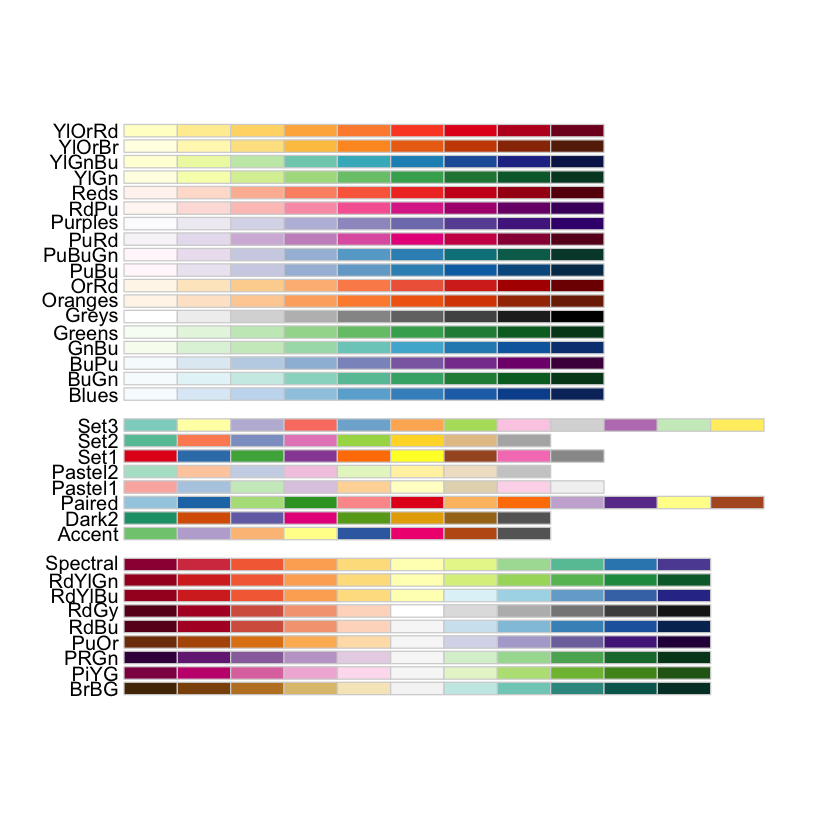

In [12]:
library(RColorBrewer)
display.brewer.all()

Nun plotten wir das Grid am Zeitschritt i mit der Funktion image.plot() aus der Bibliothek "fields" und einer von den obigen Farbpaletten und legen anschließend ein Grid darüber.

Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.1-4 (2018-04-12) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
See www.image.ucar.edu/~nychka/Fields for
 a vignette and other supplements. 


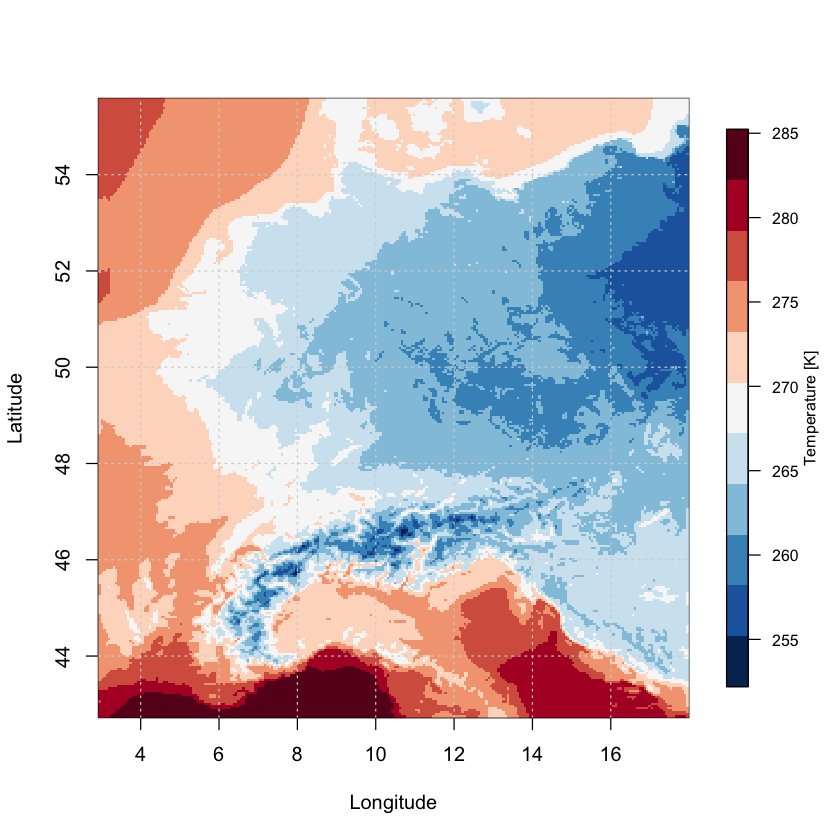

In [13]:
library(fields)
image.plot(lon,lat,t2_slice, col=rev(brewer.pal(11,"RdBu")),
           xlab="Longitude", ylab="Latitude", legend.lab = "Temperature [K]", axis.args = c(cex.axis = 0.8), legend.cex = 0.8)
grid(NULL,NULL, lwd = 1)


Das Grid können wir auch mit der levelplot()-Funktion darstellen. Hierzu müssen wir uns aus den zwei Vektoren lat und lon mit dem Befehl expand.grid() ein passendes Grid aufspannen.

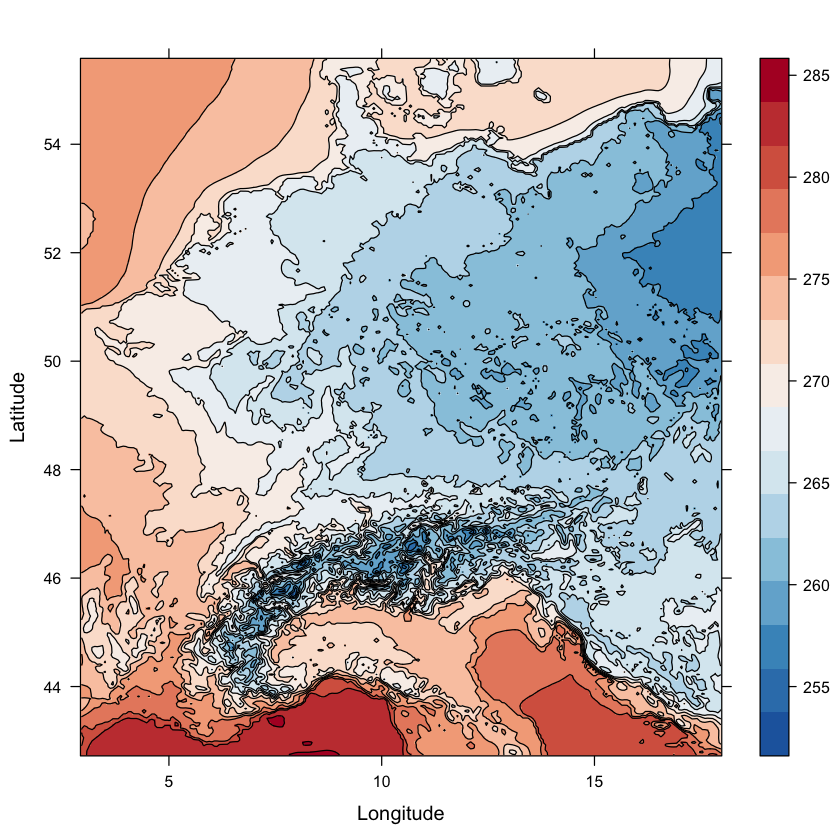

In [14]:
datagrid=expand.grid(X=lon,Y=lat)

levelplot(t2_slice~X*Y,data=datagrid,par.settings=BuRdTheme,contour=TRUE, xlab="Longitude", ylab="Latitude")

         


Als nächstes wollen wir uns 4 Grids gleichzeitig in einem Panel-Plot anschauen. Hierzu schneiden wir uns 4 Grids aus dem 3d-Array an den Zeitschritten i1 bis i4 aus und plotten diese wieder mit image.plot(). 

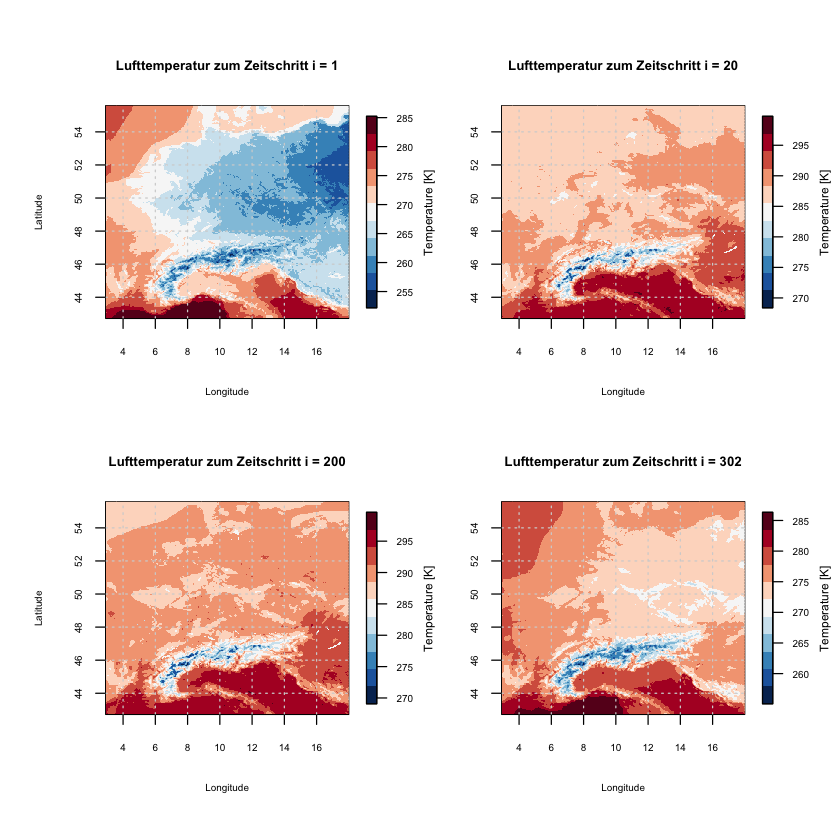

In [15]:

i1=1
i2=20
i3=200
i4=302

t2_slice1 = t2_array[,,i1]
t2_slice2 = t2_array[,,i2]
t2_slice3 = t2_array[,,i3]
t2_slice4 = t2_array[,,i4]

par(mfrow=c(2,2), omi=c(0.2, 0.2, 0.2, 0.2),cex.main=0.8)
image.plot(lon,lat,t2_slice1, col=rev(brewer.pal(11,"RdBu")),xlab="Longitude", ylab="Latitude",cex.lab=0.6, cex.axis=0.6, legend.lab = "Temperature [K]", axis.args = c(cex.axis = 0.6), legend.cex = 0.6)
grid(NULL,NULL, lwd = 1)
title(main=paste("Lufttemperatur zum Zeitschritt i =",i1))
image.plot(lon,lat,t2_slice2, col=rev(brewer.pal(11,"RdBu")),xlab="Longitude", ylab="",cex.lab=0.6,cex.axis=0.6, legend.lab = "Temperature [K]", axis.args = c(cex.axis = 0.6), legend.cex = 0.6)
grid(NULL,NULL, lwd = 1)
title(main=paste("Lufttemperatur zum Zeitschritt i =",i2))
image.plot(lon,lat,t2_slice3, col=rev(brewer.pal(11,"RdBu")),xlab="Longitude", ylab="Latitude",cex.lab=0.6,cex.axis=0.6, legend.lab = "Temperature [K]", axis.args = c(cex.axis = 0.6), legend.cex = 0.6)
grid(NULL,NULL, lwd = 1)
title(main=paste("Lufttemperatur zum Zeitschritt i =",i3))
image.plot(lon,lat,t2_slice4, col=rev(brewer.pal(11,"RdBu")),xlab="Longitude", ylab="",cex.lab=0.6,cex.axis=0.6, legend.lab = "Temperature [K]", axis.args = c(cex.axis = 0.6), legend.cex = 0.6)
grid(NULL,NULL, lwd = 1)
title(main=paste("Lufttemperatur zum Zeitschritt i =",i4))


Nun wollen wir die Temperaturdaten mit einem Zukunftsszenario vergleichen. In diesem Fall ist das ein regionales Klimamodell mit 5km horizontaler Auflösung, das mit dem Globalmodell MPI-ESM und dem Szenario RCP4.5 für den Zeitraum 2020-2049 angetrieben wurde. Wie oben laden wir uns das File herunter, öffnen das NetCDF-File und extrahieren die Variable T2.

In [16]:
#download.file("http://geography-ahc.uibk.ac.at/Data/SFCwrfout_d03_2020-2049_T2_monmean.grd",destfile="./SFCwrfout_d03_2020-2049_T2_monmean.grd")

In [17]:
ncin <- nc_open("./SFCwrfout_d03_2020-2049_T2_monmean.grd")

In [18]:
t2_array_control = t2_array
t2_array_scenario <- ncvar_get(ncin,"T2")

Mit der Funktion apply(data,dims,fun) bilden wir den Mittelwert über alle Zeitschritte und subtrahieren den Wert 273.16 um von Kelvin auf °C zu kommen.

In [19]:

t2_mean_control=apply(t2_array_control,1:2,mean)-273.16
t2_mean_scenario=apply(t2_array_scenario,1:2,mean)-273.16

Wir erstellen jetzt zwei Plots dieser mittleren Lufttemperaturen:

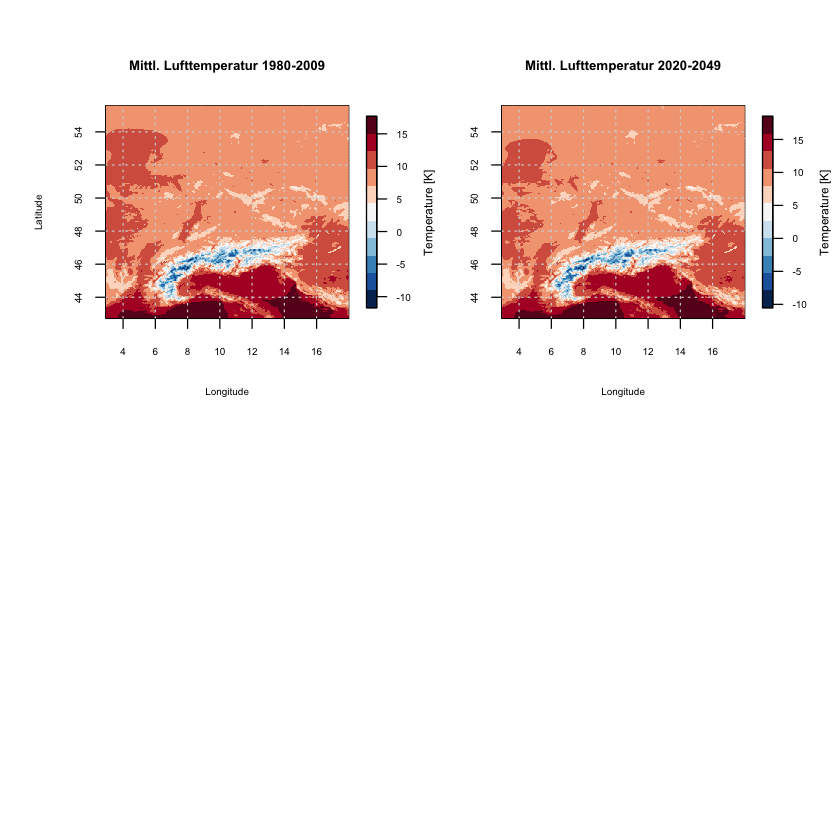

In [20]:
par(mfrow=c(2,2), omi=c(0.2, 0.2, 0.2, 0.2),cex.main=0.8)
image.plot(lon,lat,t2_mean_control, col=rev(brewer.pal(11,"RdBu")),
           xlab="Longitude", ylab="Latitude",cex.lab=0.6, cex.axis=0.6, 
           legend.lab = "Temperature [K]", axis.args = c(cex.axis = 0.6), legend.cex = 0.6)
grid(NULL,NULL, lwd = 1)
title(main=paste("Mittl. Lufttemperatur 1980-2009"))

image.plot(lon,lat,t2_mean_scenario, col=rev(brewer.pal(11,"RdBu")),
           xlab="Longitude", ylab="",cex.lab=0.6,cex.axis=0.6, 
           legend.lab = "Temperature [K]", axis.args = c(cex.axis = 0.6), legend.cex = 0.6)
grid(NULL,NULL, lwd = 1)
title(main=paste("Mittl. Lufttemperatur 2020-2049"))


Da die Temperaturunterschiede relativ gering sind können wir sie in der obigen Darstellung kaum erkennen. WIr bilden deshalb ein Differenzgrid, in dem wir die "Vergangenheit" von der "Zukunft" subtrahieren.

In [21]:

# Differenz Zukunft - Vergangenheit
diff_t2 = t2_mean_scenario - t2_mean_control 

... und plotten dieses zu unserem Plot von oben.

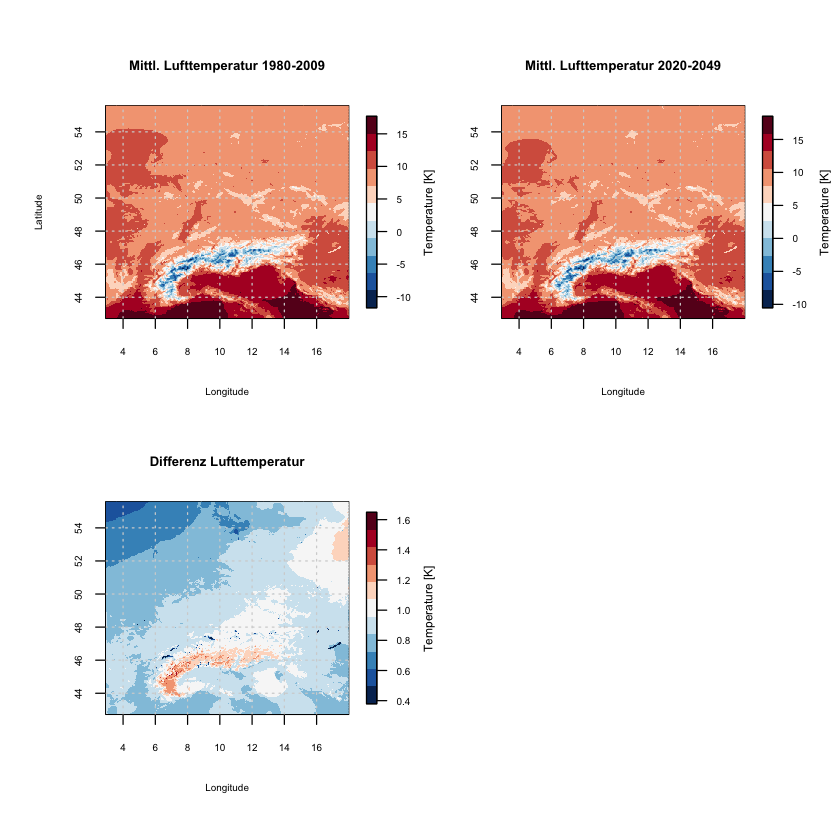

In [22]:
# copy-paste von oben
par(mfrow=c(2,2), omi=c(0.2, 0.2, 0.2, 0.2),cex.main=0.8)
image.plot(lon,lat,t2_mean_control, col=rev(brewer.pal(11,"RdBu")),xlab="Longitude", ylab="Latitude",cex.lab=0.6, cex.axis=0.6, legend.lab = "Temperature [K]", axis.args = c(cex.axis = 0.6), legend.cex = 0.6)
grid(NULL,NULL, lwd = 1)
title(main=paste("Mittl. Lufttemperatur 1980-2009"))
image.plot(lon,lat,t2_mean_scenario, col=rev(brewer.pal(11,"RdBu")),xlab="Longitude", ylab="",cex.lab=0.6,cex.axis=0.6, legend.lab = "Temperature [K]", axis.args = c(cex.axis = 0.6), legend.cex = 0.6)
grid(NULL,NULL, lwd = 1)
title(main=paste("Mittl. Lufttemperatur 2020-2049"))

# Differenzplot
image.plot(lon,lat,diff_t2, col=rev(brewer.pal(11,"RdBu")),xlab="Longitude", ylab="",cex.lab=0.6,cex.axis=0.6, legend.lab = "Temperature [K]", axis.args = c(cex.axis = 0.6), legend.cex = 0.6)
grid(NULL,NULL, lwd = 1)
title(main=paste("Differenz Lufttemperatur"))

Wir stellen den Differenzplot noch einmal in groß und mit einer anderen Farbpalette dar (heat.colors()).

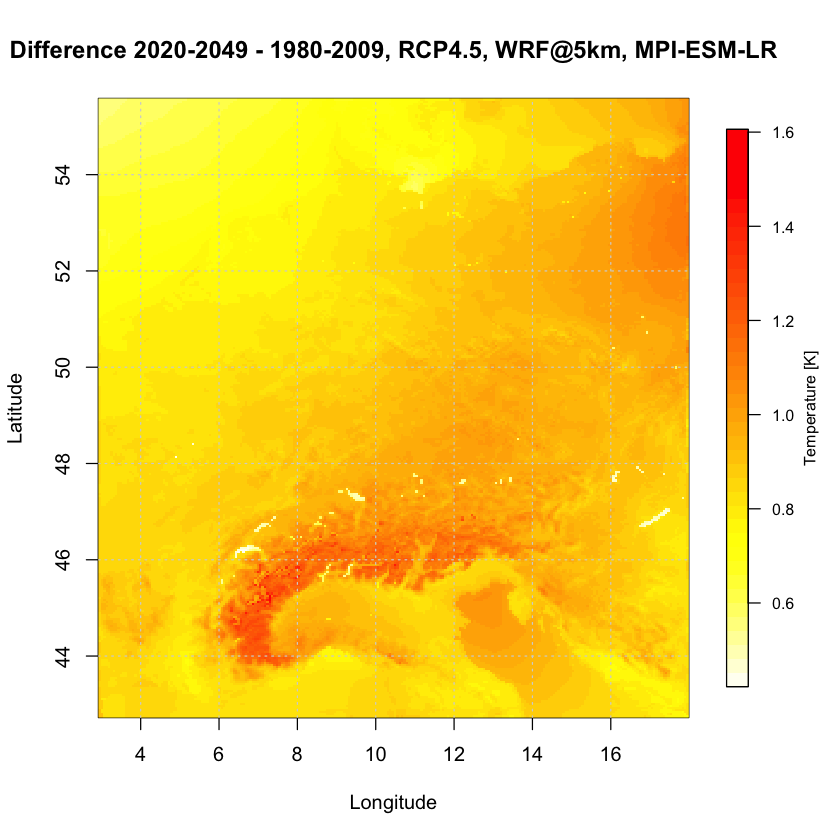

In [23]:

image.plot(lon,lat,diff_t2, col=rev(heat.colors(40)),xlab="Longitude", ylab="Latitude",legend.lab = "Temperature [K]",axis.args = c(cex.axis = 0.8), legend.cex = 0.8)
grid(NULL,NULL, lwd = 1)
title(main="Difference 2020-2049 - 1980-2009, RCP4.5, WRF@5km, MPI-ESM-LR")


## Extrahieren einer Zeitreihe am Punkt x/y aus dem 3d-Array (Grid-Stapel) [x,y,t]

Oft möchte man aus einem 3d-Array (zwei Raumdimensionen, eine Zeitdimension) eine Zeitreihe an einem bestimmten Punkt extrahieren. Dies tun wir einfach, indem wir die Dimensionen entsprechend angeben. Wir extrahieren also eine Zeitreihe an einem definierten Punkt (x/y) im Grid.

In [24]:
x=10
y=200
t2_time_series_xy = t2_array[x,y,]-273.16

In [25]:
head(t2_time_series_xy,n=10)

[1]  2.749332  4.832523  5.544437  6.307224 11.218784 14.773167 14.841251
 [8] 15.120029 13.988315 11.965305

Um die Zeitreihe zu plotten erzeugen wir uns mit der Funktion seq() eine monatlichen Zeitachse...

In [26]:
idx <- seq(as.Date('1980-01-01'), as.Date('2009-12-01'), 'month')

... und plotten nun die Zeitreihe:

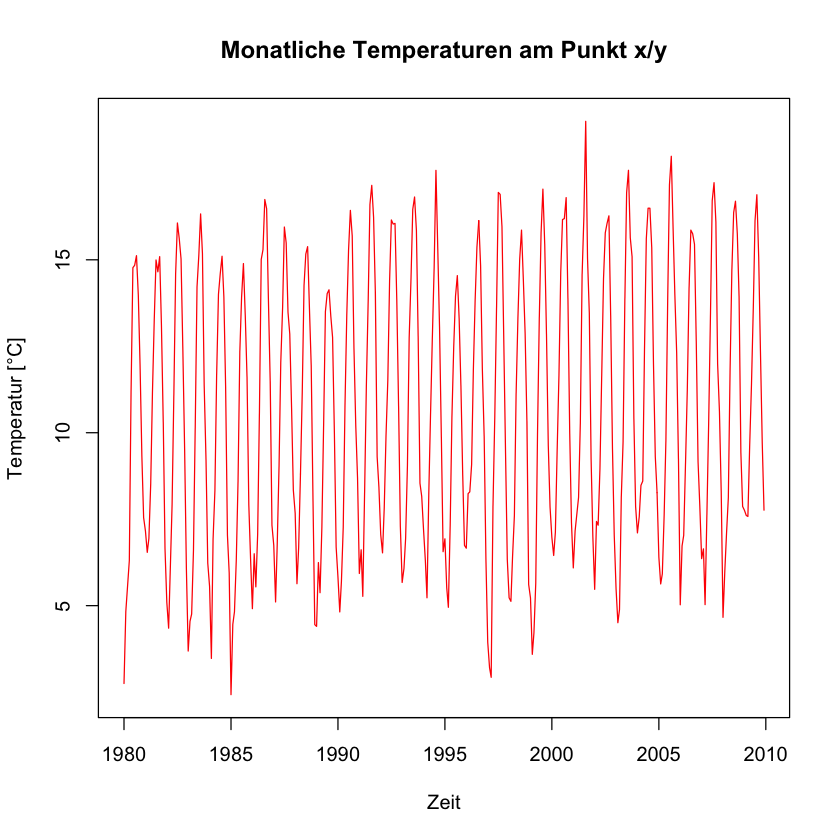

In [27]:
plot(idx, t2_time_series_xy,type="l", col="red", xlab="Zeit", ylab="Temperatur [°C]")
title("Monatliche Temperaturen am Punkt x/y")

## Über Flächen gemittelte Zeitreihen

Nun bilden wir eine über eine bestimmte Fläche gemittelte Zeitreihe mit Hilfe der Funktion apply(). Wir machen dies für unsere Kontroll- und Szenarioperioden.

In [28]:
t2_areal_mean=apply(t2_array,3,mean)-273.16
t2_areal_mean_scenario=apply(t2_array_scenario,3,mean)-273.16

... und plotten die beiden Zeitreihen.

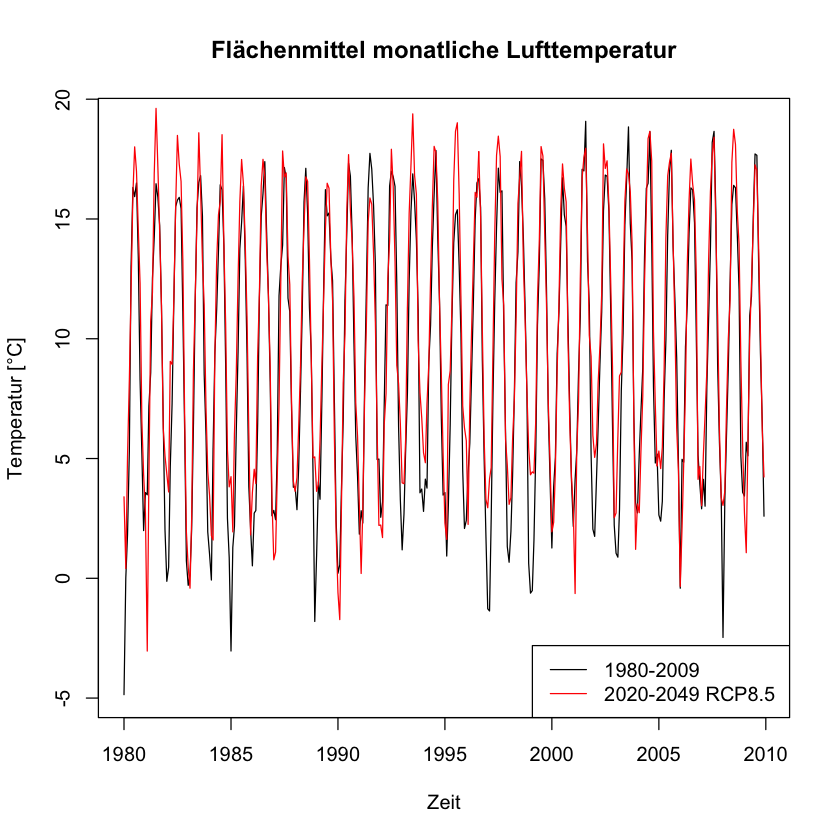

In [29]:
plot(idx, t2_areal_mean,type="l", col="black",  xlab="Zeit", ylab="Temperatur [°C]")
lines(idx, t2_areal_mean_scenario,type="l", col="red")
legend("bottomright",legend=c("1980-2009","2020-2049 RCP8.5"), col=c("black","red"),lty=1)
title(main="Flächenmittel monatliche Lufttemperatur")

## Extrahieren einer Zeitreihe für bestimmte lat/lon-Koordinaten

Nun versuchen wir, aus dem 3D-Array die Zeitreihe an einer bestimmten geographischen Koordinate zu extrahieren, z.B. für Innsbruck (lon=11.404102 und lat=47.269212). Hierzu benutzen wir die Koordinaten aus den Vektoren lat und lon. Da die Gridpunkte evtl. nicht exakt diese Koordinaten reproduzieren, suchen wir mit der Funktion which() den Index des Gridpunkts, der am nächsten an den gesuchten Koordinaten liegt. Dies machen wir mit einer Abfrage des minimalen Abstands z.B wie folgt: ind_lon=which(abs(lon-11.404102)==min(abs(lon-11.404102)))

In [30]:
# Indizes für lat und lon, also x und y bestimmen über den kleinsten Abstand:
ind_lon=which(abs(lon-11.404102)==min(abs(lon-11.404102)))
ind_lat=which(abs(lat-47.269212)==min(abs(lat-47.269212)))
ind_lon
ind_lat

# Zeitreihe an diesem Index extrahieren
t2_time_series_ibk = t2_array[ind_lon,ind_lat,]-273.16





[1] 139

[1] 102

Für einen Vergleich erzeugen wir nun einen Panel-Plot für die Temperaturzeitreihen des Flächenmittels, der Temperatur am Punkt x/y und der Temperatur in Innsbruck.

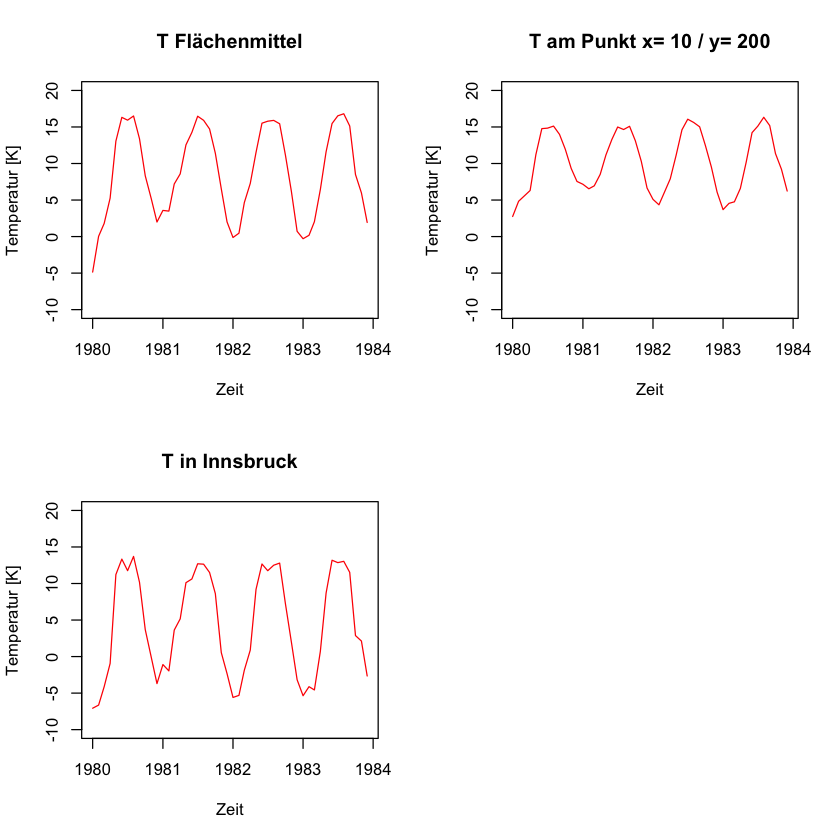

In [31]:
par(mfrow=c(2,2))
plot(idx[0:48], t2_areal_mean[0:48], ylim=c(-10,20),type="l", col="red", xlab="Zeit", ylab="Temperatur [K]")
title(main="T Flächenmittel")
plot(idx[0:48], t2_time_series_xy[0:48],ylim=c(-10,20),type="l", col="red", xlab="Zeit", ylab="Temperatur [K]")
title(main=paste("T am Punkt x=",x,"/ y=",y))
plot(idx[0:48], t2_time_series_ibk[0:48],ylim=c(-10,20),type="l", col="red", xlab="Zeit", ylab="Temperatur [K]")
title(main="T in Innsbruck")

## Ausschneiden einer Box aus dem ursprünglichen Grid(stapel)

Abschließend wollen wir noch eine bestimmte rechteckige Region aus dem Differenzen-Grid ausschneiden und darstellen. Wir fokussieren uns auf den Alpenraum mit den Koordinaten: lon_min=6, lon_max=13.5, lat_min=44, lat_max=48. Wir benutzen dazu wieder die Funktion which(), die uns mit einer konditionellen Abfrage die richtigen Indizes im Grid liefert.

In [32]:
lon_min=6
lon_max=13.5
lat_min=44
lat_max=48


t2_select=diff_t2[which(lon>=lon_min&lon<=lon_max),which(lat>=lat_min&lat<=lat_max)]


Wir wollen die Region mit levelplot() darstellen und benötigen dafür wieder die entsprechenden lat und lon Vektoren.

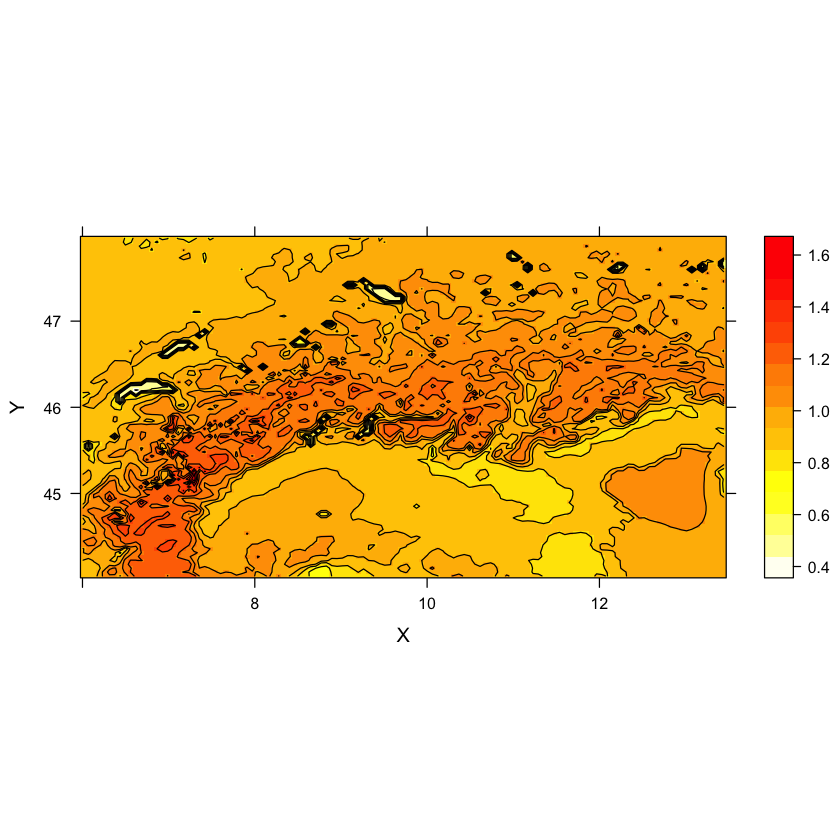

In [33]:


lon_select=lon[lon>=lon_min&lon<=lon_max]
lat_select=lat[lat>=lat_min&lat<=lat_max]

datagrid=expand.grid(X=lon_select,Y=lat_select)

levelplot(t2_select~X*Y,data=datagrid,col.regions=rev(heat.colors(40)),contour=TRUE, aspect="iso")

